# Import necessary libraries and dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Let us now check the missing values in the dataset

In [5]:
data.isnull().sum().sum()

np.int64(0)

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### The only non-transformed variables to work with are:
- `Time`
- `Amount`
- `Class` (1: fraud, 0: not_fraud)

C:\Users\Zhang\AppData\Local\Temp\ipykernel_66268\807841329.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


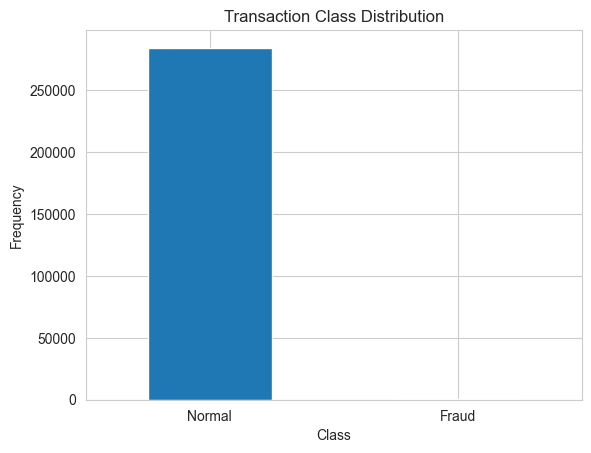

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Determine the number of fraud and valid transactions in the entire dataset.

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [10]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


Do fraudulent transactions occur more often during certain time frame ?

In [11]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


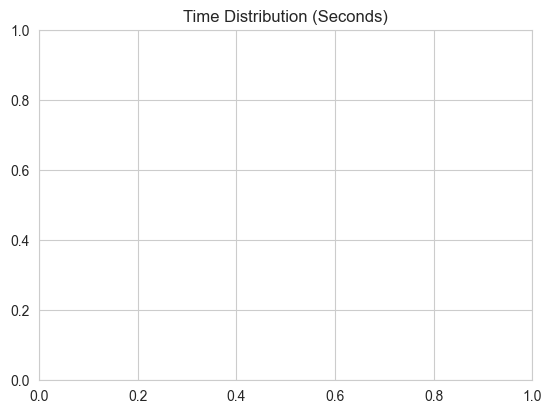

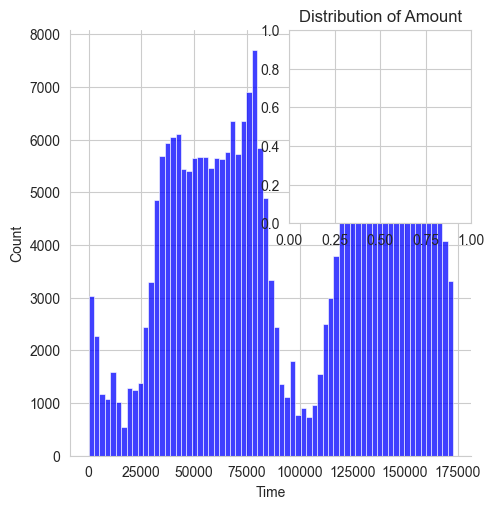

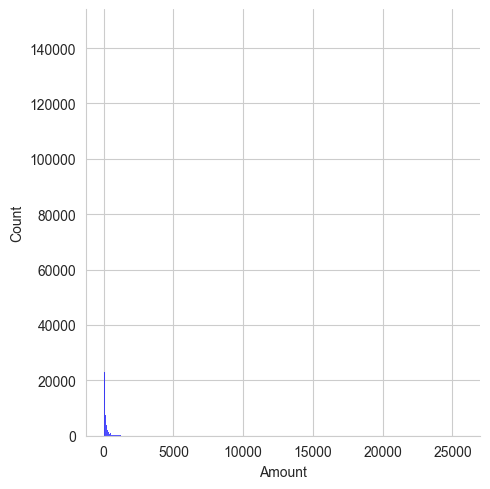

In [12]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

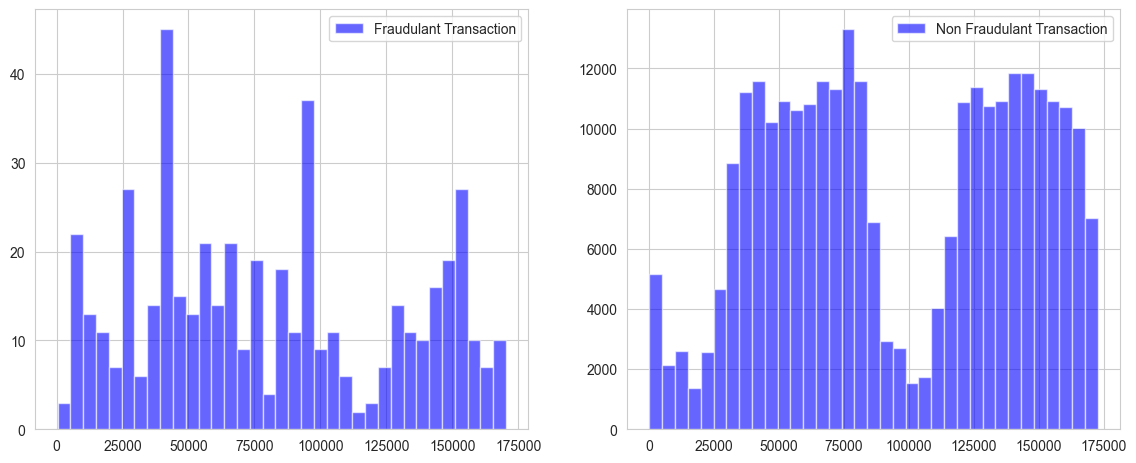

In [13]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation.
Now let us take a sample of the dataset for out modelling and prediction

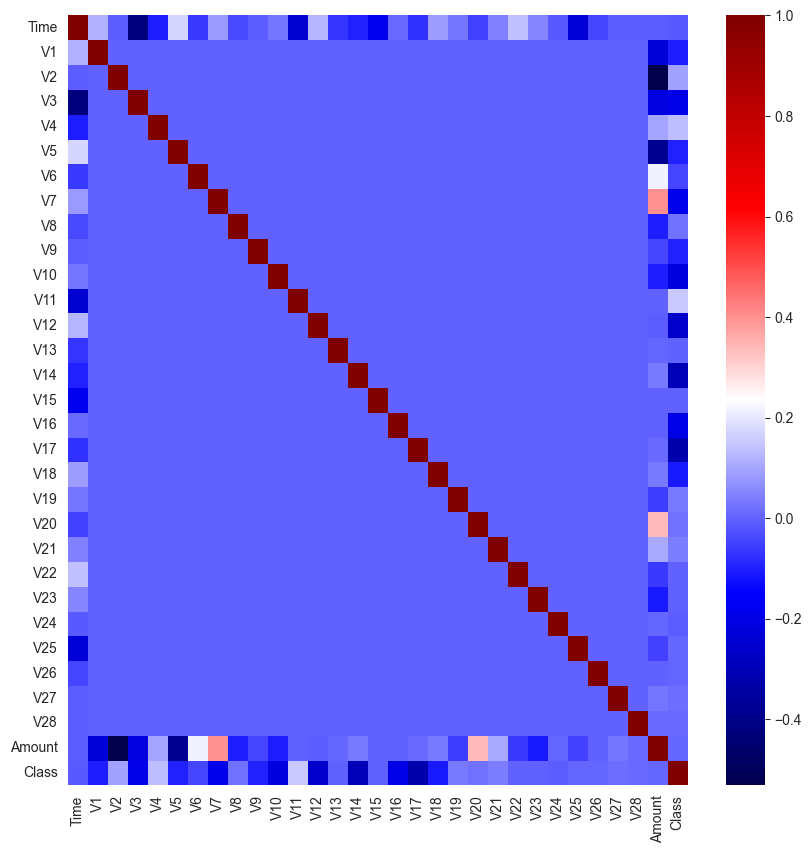

In [14]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

### Highest correlations come from:
    - Time & V3 (-0.42)
    - Amount & V2 (-0.53)
    - Amount & V4 (0.4)

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# 3. Data Pre-processing

`Time` and `Amount` should be scaled as the other columns.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [16]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# 4. Model Building
# 4. 1. Artificial Neural Network (ANNs)

In [41]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

c:\Users\Zhang\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,657 (151.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [43]:
# Create a dedicated folder to store ANN checkpoints
ckpt_dir = "checkpoints/ann"
os.makedirs(ckpt_dir, exist_ok=True)

METRICS = [
    # keras.metrics.Accuracy(name='accuracy'),  
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=METRICS
)

# Save ONLY the best model to reduce clutter
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(ckpt_dir, "best_ann_model.h5"),
    monitor="val_loss",
    mode="min",
    save_best_only=True,     # Only keep the best model file
    save_weights_only=False, # Save full model (architecture + weights)
    verbose=1
)

callbacks = [checkpoint_cb]
class_weight = {0: w_p, 1: w_n}

r = model.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    batch_size=512,
    epochs=100,
    # class_weight=class_weight,  
    callbacks=callbacks,
    verbose=1
)


Epoch 1/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 58.7533 - fp: 12012.1513 - loss: 0.4632 - precision: 0.0063 - recall: 0.5881 - tn: 65932.7270 - tp: 76.3684
Epoch 1: val_loss improved from None to 0.24024, saving model to checkpoints/ann\best_ann_model.h5



Epoch 1: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - fn: 128.0000 - fp: 21628.0000 - loss: 0.4243 - precision: 0.0073 - recall: 0.5540 - tn: 137576.0000 - tp: 159.0000 - val_fn: 15.0000 - val_fp: 12.0000 - val_loss: 0.2402 - val_precision: 0.8182 - val_recall: 0.7826 - val_tn: 39792.0000 - val_tp: 54.0000
Epoch 2/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 61.2852 - fp: 5003.4396 - loss: 0.3187 - precision: 0.0132 - recall: 0.5412 - tn: 71407.1074 - tp: 72.1678
Epoch 2: val_loss improved from 0.24024 to 0.14761, saving model to checkpoints/ann\best_ann_model.h5



Epoch 2: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 137.0000 - fp: 9021.0000 - loss: 0.2876 - precision: 0.0164 - recall: 0.5226 - tn: 150183.0000 - tp: 150.0000 - val_fn: 16.0000 - val_fp: 12.0000 - val_loss: 0.1476 - val_precision: 0.8154 - val_recall: 0.7681 - val_tn: 39792.0000 - val_tp: 53.0000
Epoch 3/100
297/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 77.3434 - fp: 2079.7677 - loss: 0.2130 - precision: 0.0232 - recall: 0.3983 - tn: 74074.9966 - tp: 55.8923
Epoch 3: val_loss improved from 0.14761 to 0.08785, saving model to checkpoints/ann\best_ann_model.h5



Epoch 3: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 169.0000 - fp: 3785.0000 - loss: 0.1898 - precision: 0.0302 - recall: 0.4111 - tn: 155419.0000 - tp: 118.0000 - val_fn: 16.0000 - val_fp: 12.0000 - val_loss: 0.0879 - val_precision: 0.8154 - val_recall: 0.7681 - val_tn: 39792.0000 - val_tp: 53.0000
Epoch 4/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 77.9734 - fp: 1009.8904 - loss: 0.1403 - precision: 0.0591 - recall: 0.4385 - tn: 76160.5914 - tp: 63.5449
Epoch 4: val_loss improved from 0.08785 to 0.05613, saving model to checkpoints/ann\best_ann_model.h5



Epoch 4: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 153.0000 - fp: 1877.0000 - loss: 0.1277 - precision: 0.0666 - recall: 0.4669 - tn: 157327.0000 - tp: 134.0000 - val_fn: 16.0000 - val_fp: 12.0000 - val_loss: 0.0561 - val_precision: 0.8154 - val_recall: 0.7681 - val_tn: 39792.0000 - val_tp: 53.0000
Epoch 5/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 81.3236 - fp: 593.0874 - loss: 0.0968 - precision: 0.0853 - recall: 0.4091 - tn: 78624.9159 - tp: 60.6731
Epoch 5: val_loss improved from 0.05613 to 0.03721, saving model to checkpoints/ann\best_ann_model.h5



Epoch 5: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 155.0000 - fp: 1110.0000 - loss: 0.0874 - precision: 0.1063 - recall: 0.4599 - tn: 158094.0000 - tp: 132.0000 - val_fn: 16.0000 - val_fp: 13.0000 - val_loss: 0.0372 - val_precision: 0.8030 - val_recall: 0.7681 - val_tn: 39791.0000 - val_tp: 53.0000
Epoch 6/100
295/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 78.8746 - fp: 357.8780 - loss: 0.0693 - precision: 0.1300 - recall: 0.4407 - tn: 75282.3661 - tp: 56.8814
Epoch 6: val_loss improved from 0.03721 to 0.02785, saving model to checkpoints/ann\best_ann_model.h5



Epoch 6: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 157.0000 - fp: 712.0000 - loss: 0.0631 - precision: 0.1544 - recall: 0.4530 - tn: 158492.0000 - tp: 130.0000 - val_fn: 16.0000 - val_fp: 13.0000 - val_loss: 0.0278 - val_precision: 0.8030 - val_recall: 0.7681 - val_tn: 39791.0000 - val_tp: 53.0000
Epoch 7/100
297/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 69.0673 - fp: 229.8485 - loss: 0.0501 - precision: 0.2263 - recall: 0.4915 - tn: 75914.2088 - tp: 74.8754
Epoch 7: val_loss improved from 0.02785 to 0.02159, saving model to checkpoints/ann\best_ann_model.h5



Epoch 7: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 134.0000 - fp: 446.0000 - loss: 0.0454 - precision: 0.2554 - recall: 0.5331 - tn: 158758.0000 - tp: 153.0000 - val_fn: 15.0000 - val_fp: 13.0000 - val_loss: 0.0216 - val_precision: 0.8060 - val_recall: 0.7826 - val_tn: 39791.0000 - val_tp: 54.0000
Epoch 8/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 73.0737 - fp: 181.6923 - loss: 0.0394 - precision: 0.2980 - recall: 0.5058 - tn: 79799.4295 - tp: 72.9936
Epoch 8: val_loss improved from 0.02159 to 0.01818, saving model to checkpoints/ann\best_ann_model.h5



Epoch 8: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 144.0000 - fp: 355.0000 - loss: 0.0362 - precision: 0.2871 - recall: 0.4983 - tn: 158849.0000 - tp: 143.0000 - val_fn: 14.0000 - val_fp: 14.0000 - val_loss: 0.0182 - val_precision: 0.7971 - val_recall: 0.7971 - val_tn: 39790.0000 - val_tp: 55.0000
Epoch 9/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 63.0772 - fp: 129.5302 - loss: 0.0297 - precision: 0.3202 - recall: 0.5164 - tn: 76285.3859 - tp: 66.0067
Epoch 9: val_loss improved from 0.01818 to 0.01541, saving model to checkpoints/ann\best_ann_model.h5



Epoch 9: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 141.0000 - fp: 250.0000 - loss: 0.0290 - precision: 0.3687 - recall: 0.5087 - tn: 158954.0000 - tp: 146.0000 - val_fn: 14.0000 - val_fp: 13.0000 - val_loss: 0.0154 - val_precision: 0.8088 - val_recall: 0.7971 - val_tn: 39791.0000 - val_tp: 55.0000
Epoch 10/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 67.3889 - fp: 113.4510 - loss: 0.0257 - precision: 0.4269 - recall: 0.5600 - tn: 78330.2712 - tp: 80.8889
Epoch 10: val_loss improved from 0.01541 to 0.01447, saving model to checkpoints/ann\best_ann_model.h5



Epoch 10: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 131.0000 - fp: 210.0000 - loss: 0.0238 - precision: 0.4262 - recall: 0.5436 - tn: 158994.0000 - tp: 156.0000 - val_fn: 14.0000 - val_fp: 14.0000 - val_loss: 0.0145 - val_precision: 0.7971 - val_recall: 0.7971 - val_tn: 39790.0000 - val_tp: 55.0000
Epoch 11/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 59.7342 - fp: 90.1794 - loss: 0.0204 - precision: 0.4562 - recall: 0.5649 - tn: 77083.8804 - tp: 78.2060
Epoch 11: val_loss improved from 0.01447 to 0.01301, saving model to checkpoints/ann\best_ann_model.h5



Epoch 11: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 126.0000 - fp: 183.0000 - loss: 0.0204 - precision: 0.4680 - recall: 0.5610 - tn: 159021.0000 - tp: 161.0000 - val_fn: 14.0000 - val_fp: 12.0000 - val_loss: 0.0130 - val_precision: 0.8209 - val_recall: 0.7971 - val_tn: 39792.0000 - val_tp: 55.0000
Epoch 12/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 66.3923 - fp: 79.6849 - loss: 0.0185 - precision: 0.4690 - recall: 0.5027 - tn: 79650.1672 - tp: 75.7556
Epoch 12: val_loss improved from 0.01301 to 0.01212, saving model to checkpoints/ann\best_ann_model.h5



Epoch 12: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 126.0000 - fp: 149.0000 - loss: 0.0173 - precision: 0.5194 - recall: 0.5610 - tn: 159055.0000 - tp: 161.0000 - val_fn: 14.0000 - val_fp: 12.0000 - val_loss: 0.0121 - val_precision: 0.8209 - val_recall: 0.7971 - val_tn: 39792.0000 - val_tp: 55.0000
Epoch 13/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 59.7600 - fp: 58.5367 - loss: 0.0150 - precision: 0.5676 - recall: 0.5750 - tn: 76857.4700 - tp: 80.2333
Epoch 13: val_loss improved from 0.01212 to 0.01148, saving model to checkpoints/ann\best_ann_model.h5



Epoch 13: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 122.0000 - fp: 124.0000 - loss: 0.0156 - precision: 0.5709 - recall: 0.5749 - tn: 159080.0000 - tp: 165.0000 - val_fn: 14.0000 - val_fp: 12.0000 - val_loss: 0.0115 - val_precision: 0.8209 - val_recall: 0.7971 - val_tn: 39792.0000 - val_tp: 55.0000
Epoch 14/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.5581 - fp: 47.1894 - loss: 0.0144 - precision: 0.6219 - recall: 0.5918 - tn: 77127.8405 - tp: 82.4120
Epoch 14: val_loss improved from 0.01148 to 0.01083, saving model to checkpoints/ann\best_ann_model.h5



Epoch 14: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 118.0000 - fp: 100.0000 - loss: 0.0138 - precision: 0.6283 - recall: 0.5889 - tn: 159104.0000 - tp: 169.0000 - val_fn: 15.0000 - val_fp: 12.0000 - val_loss: 0.0108 - val_precision: 0.8182 - val_recall: 0.7826 - val_tn: 39792.0000 - val_tp: 54.0000
Epoch 15/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.5633 - fp: 45.3733 - loss: 0.0131 - precision: 0.6012 - recall: 0.5321 - tn: 76879.3433 - tp: 73.7200
Epoch 15: val_loss did not improve from 0.01083
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 122.0000 - fp: 98.0000 - loss: 0.0124 - precision: 0.6274 - recall: 0.5749 - tn: 159106.0000 - tp: 165.0000 - val_fn: 15.0000 - val_fp: 12.0000 - val_loss: 0.0109 - val_precision: 0.8182 - val_recall: 0.7826 - val_tn: 39792.0000 - val_tp: 54.0000
Epoch 16/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 58.9194 - fp: 37.2484 - loss: 0.0119 - precision: 0.7287 - recall: 0


Epoch 16: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 116.0000 - fp: 74.0000 - loss: 0.0118 - precision: 0.6980 - recall: 0.5958 - tn: 159130.0000 - tp: 171.0000 - val_fn: 15.0000 - val_fp: 12.0000 - val_loss: 0.0103 - val_precision: 0.8182 - val_recall: 0.7826 - val_tn: 39792.0000 - val_tp: 54.0000
Epoch 17/100
296/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.3074 - fp: 44.7297 - loss: 0.0114 - precision: 0.6174 - recall: 0.5772 - tn: 75856.3311 - tp: 76.6318
Epoch 17: val_loss improved from 0.01033 to 0.00946, saving model to checkpoints/ann\best_ann_model.h5



Epoch 17: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 121.0000 - fp: 85.0000 - loss: 0.0109 - precision: 0.6614 - recall: 0.5784 - tn: 159119.0000 - tp: 166.0000 - val_fn: 15.0000 - val_fp: 11.0000 - val_loss: 0.0095 - val_precision: 0.8308 - val_recall: 0.7826 - val_tn: 39793.0000 - val_tp: 54.0000
Epoch 18/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 63.7710 - fp: 36.7613 - loss: 0.0099 - precision: 0.7070 - recall: 0.5791 - tn: 79432.5290 - tp: 82.9387
Epoch 18: val_loss improved from 0.00946 to 0.00937, saving model to checkpoints/ann\best_ann_model.h5



Epoch 18: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 126.0000 - fp: 74.0000 - loss: 0.0104 - precision: 0.6851 - recall: 0.5610 - tn: 159130.0000 - tp: 161.0000 - val_fn: 15.0000 - val_fp: 11.0000 - val_loss: 0.0094 - val_precision: 0.8308 - val_recall: 0.7826 - val_tn: 39793.0000 - val_tp: 54.0000
Epoch 19/100
296/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 48.9054 - fp: 29.8919 - loss: 0.0106 - precision: 0.7441 - recall: 0.6443 - tn: 75868.2027 - tp: 85.0000
Epoch 19: val_loss improved from 0.00937 to 0.00878, saving model to checkpoints/ann\best_ann_model.h5



Epoch 19: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 110.0000 - fp: 60.0000 - loss: 0.0095 - precision: 0.7468 - recall: 0.6167 - tn: 159144.0000 - tp: 177.0000 - val_fn: 15.0000 - val_fp: 10.0000 - val_loss: 0.0088 - val_precision: 0.8438 - val_recall: 0.7826 - val_tn: 39794.0000 - val_tp: 54.0000
Epoch 20/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.3506 - fp: 34.4123 - loss: 0.0091 - precision: 0.7300 - recall: 0.6162 - tn: 78923.4058 - tp: 88.8312
Epoch 20: val_loss improved from 0.00878 to 0.00828, saving model to checkpoints/ann\best_ann_model.h5



Epoch 20: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 116.0000 - fp: 71.0000 - loss: 0.0093 - precision: 0.7066 - recall: 0.5958 - tn: 159133.0000 - tp: 171.0000 - val_fn: 16.0000 - val_fp: 10.0000 - val_loss: 0.0083 - val_precision: 0.8413 - val_recall: 0.7681 - val_tn: 39794.0000 - val_tp: 53.0000
Epoch 21/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 66.5224 - fp: 31.2436 - loss: 0.0109 - precision: 0.6953 - recall: 0.5465 - tn: 79947.9359 - tp: 81.4872
Epoch 21: val_loss improved from 0.00828 to 0.00824, saving model to checkpoints/ann\best_ann_model.h5



Epoch 21: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 127.0000 - fp: 53.0000 - loss: 0.0090 - precision: 0.7512 - recall: 0.5575 - tn: 159151.0000 - tp: 160.0000 - val_fn: 16.0000 - val_fp: 10.0000 - val_loss: 0.0082 - val_precision: 0.8413 - val_recall: 0.7681 - val_tn: 39794.0000 - val_tp: 53.0000
Epoch 22/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 61.9669 - fp: 19.6225 - loss: 0.0077 - precision: 0.7654 - recall: 0.5436 - tn: 77408.6358 - tp: 77.7748
Epoch 22: val_loss did not improve from 0.00824
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 121.0000 - fp: 39.0000 - loss: 0.0074 - precision: 0.8098 - recall: 0.5784 - tn: 159165.0000 - tp: 166.0000 - val_fn: 15.0000 - val_fp: 10.0000 - val_loss: 0.0083 - val_precision: 0.8438 - val_recall: 0.7826 - val_tn: 39794.0000 - val_tp: 54.0000
Epoch 23/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 57.2323 - fp: 28.2516 - loss: 0.0090 - precision: 0.7134 - recall: 0.


Epoch 23: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 108.0000 - fp: 51.0000 - loss: 0.0077 - precision: 0.7783 - recall: 0.6237 - tn: 159153.0000 - tp: 179.0000 - val_fn: 16.0000 - val_fp: 10.0000 - val_loss: 0.0078 - val_precision: 0.8413 - val_recall: 0.7681 - val_tn: 39794.0000 - val_tp: 53.0000
Epoch 24/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 49.4191 - fp: 20.5908 - loss: 0.0066 - precision: 0.8025 - recall: 0.6609 - tn: 77669.0990 - tp: 84.8911
Epoch 24: val_loss improved from 0.00780 to 0.00767, saving model to checkpoints/ann\best_ann_model.h5



Epoch 24: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 109.0000 - fp: 41.0000 - loss: 0.0078 - precision: 0.8128 - recall: 0.6202 - tn: 159163.0000 - tp: 178.0000 - val_fn: 16.0000 - val_fp: 10.0000 - val_loss: 0.0077 - val_precision: 0.8413 - val_recall: 0.7681 - val_tn: 39794.0000 - val_tp: 53.0000
Epoch 25/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 52.1443 - fp: 17.5311 - loss: 0.0066 - precision: 0.8165 - recall: 0.6121 - tn: 78178.3672 - tp: 87.9574
Epoch 25: val_loss improved from 0.00767 to 0.00737, saving model to checkpoints/ann\best_ann_model.h5



Epoch 25: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 100.0000 - fp: 41.0000 - loss: 0.0067 - precision: 0.8202 - recall: 0.6516 - tn: 159163.0000 - tp: 187.0000 - val_fn: 20.0000 - val_fp: 10.0000 - val_loss: 0.0074 - val_precision: 0.8305 - val_recall: 0.7101 - val_tn: 39794.0000 - val_tp: 49.0000
Epoch 26/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 56.4026 - fp: 23.8994 - loss: 0.0071 - precision: 0.7966 - recall: 0.6095 - tn: 78942.0682 - tp: 81.6299
Epoch 26: val_loss improved from 0.00737 to 0.00720, saving model to checkpoints/ann\best_ann_model.h5



Epoch 26: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 115.0000 - fp: 50.0000 - loss: 0.0074 - precision: 0.7748 - recall: 0.5993 - tn: 159154.0000 - tp: 172.0000 - val_fn: 22.0000 - val_fp: 10.0000 - val_loss: 0.0072 - val_precision: 0.8246 - val_recall: 0.6812 - val_tn: 39794.0000 - val_tp: 47.0000
Epoch 27/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 62.6151 - fp: 18.1283 - loss: 0.0071 - precision: 0.8485 - recall: 0.5822 - tn: 77912.7303 - tp: 86.5263
Epoch 27: val_loss did not improve from 0.00720
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 120.0000 - fp: 40.0000 - loss: 0.0072 - precision: 0.8068 - recall: 0.5819 - tn: 159164.0000 - tp: 167.0000 - val_fn: 20.0000 - val_fp: 10.0000 - val_loss: 0.0074 - val_precision: 0.8305 - val_recall: 0.7101 - val_tn: 39794.0000 - val_tp: 49.0000
Epoch 28/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.7152 - fp: 18.6861 - loss: 0.0063 - precision: 0.8173 - recall: 0.


Epoch 30: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 109.0000 - fp: 44.0000 - loss: 0.0065 - precision: 0.8018 - recall: 0.6202 - tn: 159160.0000 - tp: 178.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0068 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 31/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 55.9272 - fp: 18.2781 - loss: 0.0064 - precision: 0.7971 - recall: 0.5287 - tn: 77421.4735 - tp: 72.3212
Epoch 31: val_loss did not improve from 0.00675
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 119.0000 - fp: 38.0000 - loss: 0.0068 - precision: 0.8155 - recall: 0.5854 - tn: 159166.0000 - tp: 168.0000 - val_fn: 22.0000 - val_fp: 9.0000 - val_loss: 0.0068 - val_precision: 0.8393 - val_recall: 0.6812 - val_tn: 39795.0000 - val_tp: 47.0000
Epoch 32/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 61.8994 - fp: 20.1461 - loss: 0.0064 - precision: 0.8258 - recall: 0.57


Epoch 32: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 116.0000 - fp: 42.0000 - loss: 0.0069 - precision: 0.8028 - recall: 0.5958 - tn: 159162.0000 - tp: 171.0000 - val_fn: 22.0000 - val_fp: 9.0000 - val_loss: 0.0068 - val_precision: 0.8393 - val_recall: 0.6812 - val_tn: 39795.0000 - val_tp: 47.0000
Epoch 33/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 56.7383 - fp: 16.5302 - loss: 0.0079 - precision: 0.8371 - recall: 0.5960 - tn: 76384.8322 - tp: 85.8993
Epoch 33: val_loss improved from 0.00675 to 0.00665, saving model to checkpoints/ann\best_ann_model.h5



Epoch 33: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 112.0000 - fp: 38.0000 - loss: 0.0065 - precision: 0.8216 - recall: 0.6098 - tn: 159166.0000 - tp: 175.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0066 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 34/100
295/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.7932 - fp: 19.1559 - loss: 0.0063 - precision: 0.8057 - recall: 0.5668 - tn: 75622.2576 - tp: 76.7932
Epoch 34: val_loss improved from 0.00665 to 0.00653, saving model to checkpoints/ann\best_ann_model.h5



Epoch 34: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 119.0000 - fp: 34.0000 - loss: 0.0062 - precision: 0.8317 - recall: 0.5854 - tn: 159170.0000 - tp: 168.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0065 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 35/100
303/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 59.2013 - fp: 17.0429 - loss: 0.0072 - precision: 0.8228 - recall: 0.5817 - tn: 77662.9208 - tp: 84.8350
Epoch 35: val_loss improved from 0.00653 to 0.00622, saving model to checkpoints/ann\best_ann_model.h5



Epoch 35: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 116.0000 - fp: 39.0000 - loss: 0.0065 - precision: 0.8143 - recall: 0.5958 - tn: 159165.0000 - tp: 171.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0062 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 36/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.2417 - fp: 14.8874 - loss: 0.0062 - precision: 0.8331 - recall: 0.5938 - tn: 77413.9868 - tp: 81.8841
Epoch 36: val_loss improved from 0.00622 to 0.00616, saving model to checkpoints/ann\best_ann_model.h5



Epoch 36: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 113.0000 - fp: 32.0000 - loss: 0.0064 - precision: 0.8447 - recall: 0.6063 - tn: 159172.0000 - tp: 174.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0062 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 37/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 64.8516 - fp: 15.8581 - loss: 0.0067 - precision: 0.8328 - recall: 0.5276 - tn: 79453.6677 - tp: 81.6226
Epoch 37: val_loss improved from 0.00616 to 0.00614, saving model to checkpoints/ann\best_ann_model.h5



Epoch 37: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 120.0000 - fp: 35.0000 - loss: 0.0065 - precision: 0.8267 - recall: 0.5819 - tn: 159169.0000 - tp: 167.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0061 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 38/100
296/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 51.8176 - fp: 20.4459 - loss: 0.0059 - precision: 0.7771 - recall: 0.6161 - tn: 75877.7736 - tp: 81.9628
Epoch 38: val_loss did not improve from 0.00614
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 113.0000 - fp: 39.0000 - loss: 0.0054 - precision: 0.8169 - recall: 0.6063 - tn: 159165.0000 - tp: 174.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0062 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 39/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 55.6861 - fp: 18.1036 - loss: 0.0062 - precision: 0.8456 - recall: 0.62


Epoch 39: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 111.0000 - fp: 32.0000 - loss: 0.0060 - precision: 0.8462 - recall: 0.6132 - tn: 159172.0000 - tp: 176.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0061 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 40/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 60.9871 - fp: 18.0935 - loss: 0.0061 - precision: 0.8353 - recall: 0.5893 - tn: 79446.5871 - tp: 90.3323
Epoch 40: val_loss improved from 0.00611 to 0.00600, saving model to checkpoints/ann\best_ann_model.h5



Epoch 40: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 114.0000 - fp: 34.0000 - loss: 0.0055 - precision: 0.8357 - recall: 0.6028 - tn: 159170.0000 - tp: 173.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0060 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 41/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.3452 - fp: 15.0742 - loss: 0.0061 - precision: 0.8704 - recall: 0.6306 - tn: 79452.5774 - tp: 94.0032
Epoch 41: val_loss improved from 0.00600 to 0.00591, saving model to checkpoints/ann\best_ann_model.h5



Epoch 41: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 103.0000 - fp: 31.0000 - loss: 0.0056 - precision: 0.8558 - recall: 0.6411 - tn: 159173.0000 - tp: 184.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0059 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 42/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 46.4693 - fp: 14.5566 - loss: 0.0048 - precision: 0.8586 - recall: 0.6757 - tn: 79210.3107 - tp: 88.6634
Epoch 42: val_loss improved from 0.00591 to 0.00572, saving model to checkpoints/ann\best_ann_model.h5



Epoch 42: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 110.0000 - fp: 30.0000 - loss: 0.0054 - precision: 0.8551 - recall: 0.6167 - tn: 159174.0000 - tp: 177.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0057 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 43/100
295/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 47.8169 - fp: 14.4441 - loss: 0.0052 - precision: 0.8659 - recall: 0.6532 - tn: 75626.1424 - tp: 87.5966
Epoch 43: val_loss improved from 0.00572 to 0.00561, saving model to checkpoints/ann\best_ann_model.h5



Epoch 43: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 96.0000 - fp: 34.0000 - loss: 0.0056 - precision: 0.8489 - recall: 0.6655 - tn: 159170.0000 - tp: 191.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0056 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 44/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 60.8071 - fp: 19.1929 - loss: 0.0064 - precision: 0.8035 - recall: 0.5534 - tn: 79712.6688 - tp: 79.3312
Epoch 44: val_loss improved from 0.00561 to 0.00556, saving model to checkpoints/ann\best_ann_model.h5



Epoch 44: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 119.0000 - fp: 34.0000 - loss: 0.0057 - precision: 0.8317 - recall: 0.5854 - tn: 159170.0000 - tp: 168.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0056 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 45/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 52.5050 - fp: 16.9834 - loss: 0.0047 - precision: 0.8018 - recall: 0.5830 - tn: 77162.3688 - tp: 80.1429
Epoch 45: val_loss did not improve from 0.00556
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 118.0000 - fp: 32.0000 - loss: 0.0055 - precision: 0.8408 - recall: 0.5889 - tn: 159172.0000 - tp: 169.0000 - val_fn: 22.0000 - val_fp: 7.0000 - val_loss: 0.0056 - val_precision: 0.8704 - val_recall: 0.6812 - val_tn: 39797.0000 - val_tp: 47.0000
Epoch 46/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 52.6548 - fp: 22.3387 - loss: 0.0052 - precision: 0.7851 - recall: 0.65


Epoch 46: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 107.0000 - fp: 38.0000 - loss: 0.0055 - precision: 0.8257 - recall: 0.6272 - tn: 159166.0000 - tp: 180.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0056 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 47/100
307/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.6026 - fp: 18.3322 - loss: 0.0062 - precision: 0.8062 - recall: 0.5875 - tn: 78684.5016 - tp: 87.5635
Epoch 47: val_loss improved from 0.00555 to 0.00553, saving model to checkpoints/ann\best_ann_model.h5



Epoch 47: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 107.0000 - fp: 35.0000 - loss: 0.0053 - precision: 0.8372 - recall: 0.6272 - tn: 159169.0000 - tp: 180.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0055 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 48/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 59.6891 - fp: 15.2500 - loss: 0.0059 - precision: 0.8561 - recall: 0.5983 - tn: 79961.8622 - tp: 90.3878
Epoch 48: val_loss improved from 0.00553 to 0.00548, saving model to checkpoints/ann\best_ann_model.h5



Epoch 48: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 109.0000 - fp: 33.0000 - loss: 0.0053 - precision: 0.8436 - recall: 0.6202 - tn: 159171.0000 - tp: 178.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0055 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 49/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.1546 - fp: 17.5197 - loss: 0.0047 - precision: 0.8158 - recall: 0.6128 - tn: 77922.2599 - tp: 86.0658
Epoch 49: val_loss improved from 0.00548 to 0.00534, saving model to checkpoints/ann\best_ann_model.h5



Epoch 49: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 117.0000 - fp: 37.0000 - loss: 0.0053 - precision: 0.8213 - recall: 0.5923 - tn: 159167.0000 - tp: 170.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0053 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 50/100
299/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 55.6355 - fp: 18.2809 - loss: 0.0061 - precision: 0.8369 - recall: 0.6189 - tn: 76643.3311 - tp: 82.7525
Epoch 50: val_loss improved from 0.00534 to 0.00520, saving model to checkpoints/ann\best_ann_model.h5



Epoch 50: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 111.0000 - fp: 36.0000 - loss: 0.0055 - precision: 0.8302 - recall: 0.6132 - tn: 159168.0000 - tp: 176.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0052 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 51/100
299/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 47.9900 - fp: 13.6321 - loss: 0.0041 - precision: 0.8850 - recall: 0.6995 - tn: 76646.6555 - tp: 91.7224
Epoch 51: val_loss improved from 0.00520 to 0.00502, saving model to checkpoints/ann\best_ann_model.h5



Epoch 51: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 108.0000 - fp: 30.0000 - loss: 0.0052 - precision: 0.8565 - recall: 0.6237 - tn: 159174.0000 - tp: 179.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 52/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 56.1006 - fp: 12.7825 - loss: 0.0055 - precision: 0.8805 - recall: 0.5922 - tn: 78947.4481 - tp: 87.6688
Epoch 52: val_loss did not improve from 0.00502
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 111.0000 - fp: 27.0000 - loss: 0.0050 - precision: 0.8670 - recall: 0.6132 - tn: 159177.0000 - tp: 176.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0051 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 53/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 42.5803 - fp: 12.4393 - loss: 0.0048 - precision: 0.8786 - recall: 0.69


Epoch 54: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 104.0000 - fp: 38.0000 - loss: 0.0054 - precision: 0.8281 - recall: 0.6376 - tn: 159166.0000 - tp: 183.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 55/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 55.8933 - fp: 20.4600 - loss: 0.0064 - precision: 0.7776 - recall: 0.5895 - tn: 76902.7600 - tp: 76.8867
Epoch 55: val_loss improved from 0.00498 to 0.00488, saving model to checkpoints/ann\best_ann_model.h5



Epoch 55: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 124.0000 - fp: 38.0000 - loss: 0.0055 - precision: 0.8109 - recall: 0.5679 - tn: 159166.0000 - tp: 163.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0049 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 56/100
296/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 54.8007 - fp: 16.4865 - loss: 0.0054 - precision: 0.8157 - recall: 0.5877 - tn: 75879.3108 - tp: 81.4020
Epoch 56: val_loss did not improve from 0.00488
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 110.0000 - fp: 33.0000 - loss: 0.0050 - precision: 0.8429 - recall: 0.6167 - tn: 159171.0000 - tp: 177.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0050 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 57/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 46.6026 - fp: 12.6090 - loss: 0.0047 - precision: 0.8985 - recall: 0.69


Epoch 57: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 101.0000 - fp: 28.0000 - loss: 0.0052 - precision: 0.8692 - recall: 0.6481 - tn: 159176.0000 - tp: 186.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0049 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 58/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 48.0097 - fp: 15.2129 - loss: 0.0044 - precision: 0.8630 - recall: 0.6735 - tn: 79454.4226 - tp: 98.3548
Epoch 58: val_loss improved from 0.00486 to 0.00478, saving model to checkpoints/ann\best_ann_model.h5



Epoch 58: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 102.0000 - fp: 34.0000 - loss: 0.0049 - precision: 0.8447 - recall: 0.6446 - tn: 159170.0000 - tp: 185.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0048 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 59/100
308/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 58.1169 - fp: 16.4643 - loss: 0.0050 - precision: 0.8224 - recall: 0.5766 - tn: 78945.1526 - tp: 84.2662
Epoch 59: val_loss improved from 0.00478 to 0.00476, saving model to checkpoints/ann\best_ann_model.h5



Epoch 59: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 109.0000 - fp: 31.0000 - loss: 0.0048 - precision: 0.8517 - recall: 0.6202 - tn: 159173.0000 - tp: 178.0000 - val_fn: 24.0000 - val_fp: 7.0000 - val_loss: 0.0048 - val_precision: 0.8654 - val_recall: 0.6522 - val_tn: 39797.0000 - val_tp: 45.0000
Epoch 60/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 57.6046 - fp: 15.7582 - loss: 0.0053 - precision: 0.8404 - recall: 0.6132 - tn: 78426.8399 - tp: 91.7974
Epoch 60: val_loss improved from 0.00476 to 0.00467, saving model to checkpoints/ann\best_ann_model.h5



Epoch 60: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 107.0000 - fp: 29.0000 - loss: 0.0049 - precision: 0.8612 - recall: 0.6272 - tn: 159175.0000 - tp: 180.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0047 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 61/100
309/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 51.1845 - fp: 17.0032 - loss: 0.0044 - precision: 0.8170 - recall: 0.5826 - tn: 79206.0583 - tp: 85.7540
Epoch 61: val_loss improved from 0.00467 to 0.00463, saving model to checkpoints/ann\best_ann_model.h5



Epoch 61: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 103.0000 - fp: 34.0000 - loss: 0.0046 - precision: 0.8440 - recall: 0.6411 - tn: 159170.0000 - tp: 184.0000 - val_fn: 26.0000 - val_fp: 7.0000 - val_loss: 0.0046 - val_precision: 0.8600 - val_recall: 0.6232 - val_tn: 39797.0000 - val_tp: 43.0000
Epoch 62/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 59.9582 - fp: 18.5981 - loss: 0.0045 - precision: 0.8503 - recall: 0.5947 - tn: 79701.9839 - tp: 91.4598
Epoch 62: val_loss improved from 0.00463 to 0.00462, saving model to checkpoints/ann\best_ann_model.h5



Epoch 62: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 114.0000 - fp: 36.0000 - loss: 0.0045 - precision: 0.8278 - recall: 0.6028 - tn: 159168.0000 - tp: 173.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0046 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 63/100
297/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 48.6902 - fp: 17.8047 - loss: 0.0042 - precision: 0.7786 - recall: 0.6120 - tn: 76143.0404 - tp: 78.4646
Epoch 63: val_loss improved from 0.00462 to 0.00452, saving model to checkpoints/ann\best_ann_model.h5



Epoch 63: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 111.0000 - fp: 39.0000 - loss: 0.0048 - precision: 0.8186 - recall: 0.6132 - tn: 159165.0000 - tp: 176.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0045 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 64/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 50.2852 - fp: 12.2987 - loss: 0.0040 - precision: 0.8886 - recall: 0.6384 - tn: 76397.2953 - tp: 84.1208
Epoch 64: val_loss improved from 0.00452 to 0.00450, saving model to checkpoints/ann\best_ann_model.h5



Epoch 64: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 109.0000 - fp: 28.0000 - loss: 0.0048 - precision: 0.8641 - recall: 0.6202 - tn: 159176.0000 - tp: 178.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0045 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 65/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 47.9037 - fp: 12.0698 - loss: 0.0046 - precision: 0.8937 - recall: 0.6586 - tn: 77165.9801 - tp: 86.0465
Epoch 65: val_loss improved from 0.00450 to 0.00446, saving model to checkpoints/ann\best_ann_model.h5



Epoch 65: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 108.0000 - fp: 25.0000 - loss: 0.0051 - precision: 0.8775 - recall: 0.6237 - tn: 159179.0000 - tp: 179.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0045 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 66/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 46.5833 - fp: 12.8782 - loss: 0.0038 - precision: 0.8832 - recall: 0.6658 - tn: 79976.2628 - tp: 91.4647
Epoch 66: val_loss improved from 0.00446 to 0.00437, saving model to checkpoints/ann\best_ann_model.h5



Epoch 66: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 97.0000 - fp: 27.0000 - loss: 0.0044 - precision: 0.8756 - recall: 0.6620 - tn: 159177.0000 - tp: 190.0000 - val_fn: 23.0000 - val_fp: 6.0000 - val_loss: 0.0044 - val_precision: 0.8846 - val_recall: 0.6667 - val_tn: 39798.0000 - val_tp: 46.0000
Epoch 67/100
299/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 55.5753 - fp: 15.5853 - loss: 0.0049 - precision: 0.8438 - recall: 0.5913 - tn: 76641.7425 - tp: 87.0970
Epoch 67: val_loss did not improve from 0.00437
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 103.0000 - fp: 33.0000 - loss: 0.0044 - precision: 0.8479 - recall: 0.6411 - tn: 159171.0000 - tp: 184.0000 - val_fn: 23.0000 - val_fp: 7.0000 - val_loss: 0.0044 - val_precision: 0.8679 - val_recall: 0.6667 - val_tn: 39797.0000 - val_tp: 46.0000
Epoch 68/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 52.7282 - fp: 15.6779 - loss: 0.0047 - precision: 0.8435 - recall: 0.609


Epoch 72: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 102.0000 - fp: 34.0000 - loss: 0.0048 - precision: 0.8447 - recall: 0.6446 - tn: 159170.0000 - tp: 185.0000 - val_fn: 26.0000 - val_fp: 6.0000 - val_loss: 0.0044 - val_precision: 0.8776 - val_recall: 0.6232 - val_tn: 39798.0000 - val_tp: 43.0000
Epoch 73/100
301/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 46.2093 - fp: 13.4485 - loss: 0.0046 - precision: 0.8686 - recall: 0.6551 - tn: 77162.8937 - tp: 89.4485
Epoch 73: val_loss improved from 0.00436 to 0.00431, saving model to checkpoints/ann\best_ann_model.h5



Epoch 73: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 98.0000 - fp: 24.0000 - loss: 0.0042 - precision: 0.8873 - recall: 0.6585 - tn: 159180.0000 - tp: 189.0000 - val_fn: 23.0000 - val_fp: 6.0000 - val_loss: 0.0043 - val_precision: 0.8846 - val_recall: 0.6667 - val_tn: 39798.0000 - val_tp: 46.0000
Epoch 74/100
306/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 53.2582 - fp: 14.2451 - loss: 0.0047 - precision: 0.8743 - recall: 0.6384 - tn: 78435.3170 - tp: 89.1797
Epoch 74: val_loss improved from 0.00431 to 0.00427, saving model to checkpoints/ann\best_ann_model.h5



Epoch 74: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 104.0000 - fp: 29.0000 - loss: 0.0047 - precision: 0.8632 - recall: 0.6376 - tn: 159175.0000 - tp: 183.0000 - val_fn: 23.0000 - val_fp: 5.0000 - val_loss: 0.0043 - val_precision: 0.9020 - val_recall: 0.6667 - val_tn: 39799.0000 - val_tp: 46.0000
Epoch 75/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 52.2019 - fp: 16.0096 - loss: 0.0052 - precision: 0.8501 - recall: 0.6474 - tn: 79962.8846 - tp: 96.0929
Epoch 75: val_loss improved from 0.00427 to 0.00425, saving model to checkpoints/ann\best_ann_model.h5



Epoch 75: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 98.0000 - fp: 29.0000 - loss: 0.0045 - precision: 0.8670 - recall: 0.6585 - tn: 159175.0000 - tp: 189.0000 - val_fn: 23.0000 - val_fp: 6.0000 - val_loss: 0.0043 - val_precision: 0.8846 - val_recall: 0.6667 - val_tn: 39798.0000 - val_tp: 46.0000
Epoch 76/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 46.1159 - fp: 16.9404 - loss: 0.0043 - precision: 0.8576 - recall: 0.6851 - tn: 77408.7781 - tp: 96.1656
Epoch 76: val_loss did not improve from 0.00425
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 96.0000 - fp: 34.0000 - loss: 0.0041 - precision: 0.8489 - recall: 0.6655 - tn: 159170.0000 - tp: 191.0000 - val_fn: 25.0000 - val_fp: 4.0000 - val_loss: 0.0043 - val_precision: 0.9167 - val_recall: 0.6377 - val_tn: 39800.0000 - val_tp: 44.0000
Epoch 77/100
310/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 53.2484 - fp: 14.9581 - loss: 0.0049 - precision: 0.8629 - recall: 0.6119


Epoch 77: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 104.0000 - fp: 29.0000 - loss: 0.0045 - precision: 0.8632 - recall: 0.6376 - tn: 159175.0000 - tp: 183.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0042 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 78/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 45.2152 - fp: 13.2616 - loss: 0.0040 - precision: 0.8925 - recall: 0.6711 - tn: 77417.8907 - tp: 91.6325
Epoch 78: val_loss improved from 0.00422 to 0.00417, saving model to checkpoints/ann\best_ann_model.h5



Epoch 78: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 105.0000 - fp: 30.0000 - loss: 0.0043 - precision: 0.8585 - recall: 0.6341 - tn: 159174.0000 - tp: 182.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0042 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 79/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 45.9178 - fp: 11.9901 - loss: 0.0040 - precision: 0.9022 - recall: 0.6515 - tn: 77931.3783 - tp: 90.7138
Epoch 79: val_loss improved from 0.00417 to 0.00410, saving model to checkpoints/ann\best_ann_model.h5



Epoch 79: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 98.0000 - fp: 25.0000 - loss: 0.0042 - precision: 0.8832 - recall: 0.6585 - tn: 159179.0000 - tp: 189.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0041 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 80/100
300/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 44.2033 - fp: 12.6400 - loss: 0.0041 - precision: 0.8784 - recall: 0.6889 - tn: 76897.3633 - tp: 101.7933
Epoch 80: val_loss improved from 0.00410 to 0.00406, saving model to checkpoints/ann\best_ann_model.h5



Epoch 80: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 88.0000 - fp: 24.0000 - loss: 0.0040 - precision: 0.8924 - recall: 0.6934 - tn: 159180.0000 - tp: 199.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0041 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 81/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 47.1122 - fp: 12.7724 - loss: 0.0045 - precision: 0.8708 - recall: 0.6459 - tn: 79974.8718 - tp: 92.4327
Epoch 81: val_loss did not improve from 0.00406
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 91.0000 - fp: 24.0000 - loss: 0.0041 - precision: 0.8909 - recall: 0.6829 - tn: 159180.0000 - tp: 196.0000 - val_fn: 23.0000 - val_fp: 6.0000 - val_loss: 0.0041 - val_precision: 0.8846 - val_recall: 0.6667 - val_tn: 39798.0000 - val_tp: 46.0000
Epoch 82/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 43.1639 - fp: 11.9672 - loss: 0.0043 - precision: 0.8978 - recall: 0.6954


Epoch 83: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 108.0000 - fp: 26.0000 - loss: 0.0042 - precision: 0.8732 - recall: 0.6237 - tn: 159178.0000 - tp: 179.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0040 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 84/100
297/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 39.6498 - fp: 15.9832 - loss: 0.0038 - precision: 0.8542 - recall: 0.7164 - tn: 76135.7609 - tp: 96.6061
Epoch 84: val_loss did not improve from 0.00398
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 94.0000 - fp: 36.0000 - loss: 0.0043 - precision: 0.8428 - recall: 0.6725 - tn: 159168.0000 - tp: 193.0000 - val_fn: 26.0000 - val_fp: 4.0000 - val_loss: 0.0041 - val_precision: 0.9149 - val_recall: 0.6232 - val_tn: 39800.0000 - val_tp: 43.0000
Epoch 85/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 56.1225 - fp: 12.3576 - loss: 0.0043 - precision: 0.8958 - recall: 0.602


Epoch 88: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 103.0000 - fp: 30.0000 - loss: 0.0043 - precision: 0.8598 - recall: 0.6411 - tn: 159174.0000 - tp: 184.0000 - val_fn: 23.0000 - val_fp: 3.0000 - val_loss: 0.0040 - val_precision: 0.9388 - val_recall: 0.6667 - val_tn: 39801.0000 - val_tp: 46.0000
Epoch 89/100
299/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 45.3278 - fp: 16.4916 - loss: 0.0036 - precision: 0.8175 - recall: 0.6563 - tn: 76641.6656 - tp: 96.5151
Epoch 89: val_loss did not improve from 0.00395
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 96.0000 - fp: 31.0000 - loss: 0.0039 - precision: 0.8604 - recall: 0.6655 - tn: 159173.0000 - tp: 191.0000 - val_fn: 25.0000 - val_fp: 3.0000 - val_loss: 0.0040 - val_precision: 0.9362 - val_recall: 0.6377 - val_tn: 39801.0000 - val_tp: 44.0000
Epoch 90/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 50.8361 - fp: 14.9115 - loss: 0.0042 - precision: 0.8283 - recall: 0.635


Epoch 92: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 96.0000 - fp: 29.0000 - loss: 0.0039 - precision: 0.8682 - recall: 0.6655 - tn: 159175.0000 - tp: 191.0000 - val_fn: 23.0000 - val_fp: 5.0000 - val_loss: 0.0039 - val_precision: 0.9020 - val_recall: 0.6667 - val_tn: 39799.0000 - val_tp: 46.0000
Epoch 93/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 50.4597 - fp: 12.0268 - loss: 0.0043 - precision: 0.8897 - recall: 0.6511 - tn: 76392.5470 - tp: 88.9664
Epoch 93: val_loss improved from 0.00388 to 0.00388, saving model to checkpoints/ann\best_ann_model.h5



Epoch 93: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 101.0000 - fp: 26.0000 - loss: 0.0041 - precision: 0.8774 - recall: 0.6481 - tn: 159178.0000 - tp: 186.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0039 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 94/100
298/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 44.6577 - fp: 14.1980 - loss: 0.0038 - precision: 0.8877 - recall: 0.7178 - tn: 76388.7517 - tp: 96.3926
Epoch 94: val_loss did not improve from 0.00388
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 93.0000 - fp: 29.0000 - loss: 0.0040 - precision: 0.8700 - recall: 0.6760 - tn: 159175.0000 - tp: 194.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0039 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 95/100
311/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 47.5145 - fp: 12.7267 - loss: 0.0040 - precision: 0.9010 - recall: 0.679


Epoch 96: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 98.0000 - fp: 29.0000 - loss: 0.0038 - precision: 0.8670 - recall: 0.6585 - tn: 159175.0000 - tp: 189.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0039 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 97/100
302/312 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - fn: 41.4338 - fp: 12.9735 - loss: 0.0031 - precision: 0.8735 - recall: 0.7195 - tn: 77420.5695 - tp: 93.0232
Epoch 97: val_loss improved from 0.00387 to 0.00386, saving model to checkpoints/ann\best_ann_model.h5



Epoch 97: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 93.0000 - fp: 28.0000 - loss: 0.0039 - precision: 0.8739 - recall: 0.6760 - tn: 159176.0000 - tp: 194.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0039 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 98/100
305/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 45.3213 - fp: 13.0131 - loss: 0.0035 - precision: 0.8611 - recall: 0.6682 - tn: 78189.0328 - tp: 88.6328
Epoch 98: val_loss improved from 0.00386 to 0.00385, saving model to checkpoints/ann\best_ann_model.h5



Epoch 98: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 100.0000 - fp: 31.0000 - loss: 0.0039 - precision: 0.8578 - recall: 0.6516 - tn: 159173.0000 - tp: 187.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0039 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000
Epoch 99/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 46.9704 - fp: 15.0164 - loss: 0.0033 - precision: 0.8537 - recall: 0.6846 - tn: 77924.0757 - tp: 93.9375
Epoch 99: val_loss did not improve from 0.00385
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - fn: 98.0000 - fp: 29.0000 - loss: 0.0036 - precision: 0.8670 - recall: 0.6585 - tn: 159175.0000 - tp: 189.0000 - val_fn: 23.0000 - val_fp: 5.0000 - val_loss: 0.0039 - val_precision: 0.9020 - val_recall: 0.6667 - val_tn: 39799.0000 - val_tp: 46.0000
Epoch 100/100
304/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - fn: 49.2697 - fp: 11.9934 - loss: 0.0044 - precision: 0.8961 - recall: 0.65


Epoch 100: finished saving model to checkpoints/ann\best_ann_model.h5
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - fn: 94.0000 - fp: 26.0000 - loss: 0.0038 - precision: 0.8813 - recall: 0.6725 - tn: 159178.0000 - tp: 193.0000 - val_fn: 23.0000 - val_fp: 4.0000 - val_loss: 0.0038 - val_precision: 0.9200 - val_recall: 0.6667 - val_tn: 39800.0000 - val_tp: 46.0000


In [44]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - fn: 48.0000 - fp: 6.0000 - loss: 0.0031 - precision: 0.9362 - recall: 0.6471 - tn: 85301.0000 - tp: 88.0000
[0.003146008588373661, 48.0, 6.0, 85301.0, 88.0, 0.936170220375061, 0.6470588445663452]


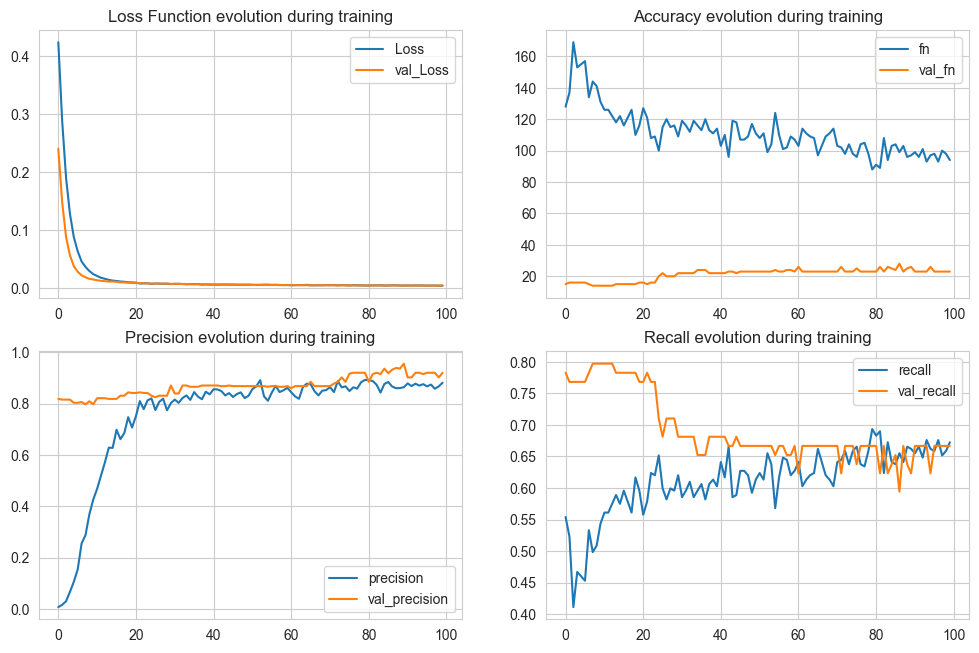

In [45]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

4985/4985 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step
Train Result:
Accuracy Score: 99.93%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.94      1.00       0.97          1.00
recall         1.00   0.63      1.00       0.82          1.00
f1-score       1.00   0.76      1.00       0.88          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159193     11]
 [   106    181]]

Test Result:
Accuracy Score: 99.94%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.94      1.00       0.97          1.00
recall        1.00   0.65      1.00       0.82          1.00
f1-score      1.00   0.77      1.00       0.88          1.00
support   85307.00 136.00      1.00  

# 4. 2. XGBoost

In [49]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    eval_metric='aucpr',
    use_label_encoder=False,
    random_state=42
)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

c:\Users\Zhang\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:59:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.91      1.00       0.95          1.00
recall        1.00   0.80      1.00       0.90          1.00
f1-score      1.00   0.85      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 3. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.92      1.00       0.96          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.86      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 4. CatBoost

In [51]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914646	total: 15.8ms	remaining: 15.8s
1:	learn: 0.2368426	total: 25.2ms	remaining: 12.6s
2:	learn: 0.1341781	total: 34.2ms	remaining: 11.4s
3:	learn: 0.0788514	total: 42.8ms	remaining: 10.6s
4:	learn: 0.0482948	total: 51ms	remaining: 10.1s
5:	learn: 0.0315326	total: 59.2ms	remaining: 9.81s
6:	learn: 0.0213628	total: 68.1ms	remaining: 9.66s
7:	learn: 0.0153604	total: 77ms	remaining: 9.54s
8:	learn: 0.0115137	total: 86.3ms	remaining: 9.5s
9:	learn: 0.0090128	total: 95.2ms	remaining: 9.43s
10:	learn: 0.0071550	total: 103ms	remaining: 9.3s
11:	learn: 0.0060638	total: 112ms	remaining: 9.21s
12:	learn: 0.0052453	total: 120ms	remaining: 9.13s
13:	learn: 0.0046542	total: 128ms	remaining: 9.01s
14:	learn: 0.0042229	total: 136ms	remaining: 8.92s
15:	learn: 0.0038780	total: 144ms	remaining: 8.86s
16:	learn: 0.0036112	total: 152ms	remaining: 8.78s
17:	learn: 0.0034152	total: 160ms	remaining: 8.72s
18:	learn: 0.0032510	total: 168ms	remaining: 8.65s
19:	lea

In [52]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.93      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.87      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

# 4. 5. KNN

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    average_precision_score,
    f1_score
)

# Define KNN pipeline: Standardization + KNN classifier
knn_clf = Pipeline([
    ("scaler", StandardScaler()),  # Normalize features to zero mean and unit variance
    ("knn", KNeighborsClassifier(
        n_neighbors=15,            # Number of nearest neighbors
        weights="distance",        # Closer neighbors have higher influence
        metric="minkowski",        
        n_jobs=-1                  
    ))
])

# Train the KNN model
knn_clf.fit(X_train, y_train)

# Predict class probabilities on test set (needed for ROC-AUC and PR-AUC)
y_test_prob = knn_clf.predict_proba(X_test)[:, 1]

# Convert probabilities to class labels using a default threshold of 0.5
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_pred = knn_clf.predict(X_train)

# Evaluate model performance
print("KNN Results")
print("ROC-AUC :", roc_auc_score(y_test, y_test_prob))
print("PR-AUC  :", average_precision_score(y_test, y_test_prob))
print(classification_report(y_test, y_test_pred, digits=4))

scores_dict['KNN'] = {
    'Train': f1_score(y_train, y_train_pred),
    'Test' : f1_score(y_test,  y_test_pred)
}


KNN Results
ROC-AUC : 0.9482795788084419
PR-AUC  : 0.8359971238355152
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     85307
           1     0.8661    0.8088    0.8365       136

    accuracy                         0.9995     85443
   macro avg     0.9329    0.9043    0.9181     85443
weighted avg     0.9995    0.9995    0.9995     85443



# 5. Model Comparaison

<Axes: >

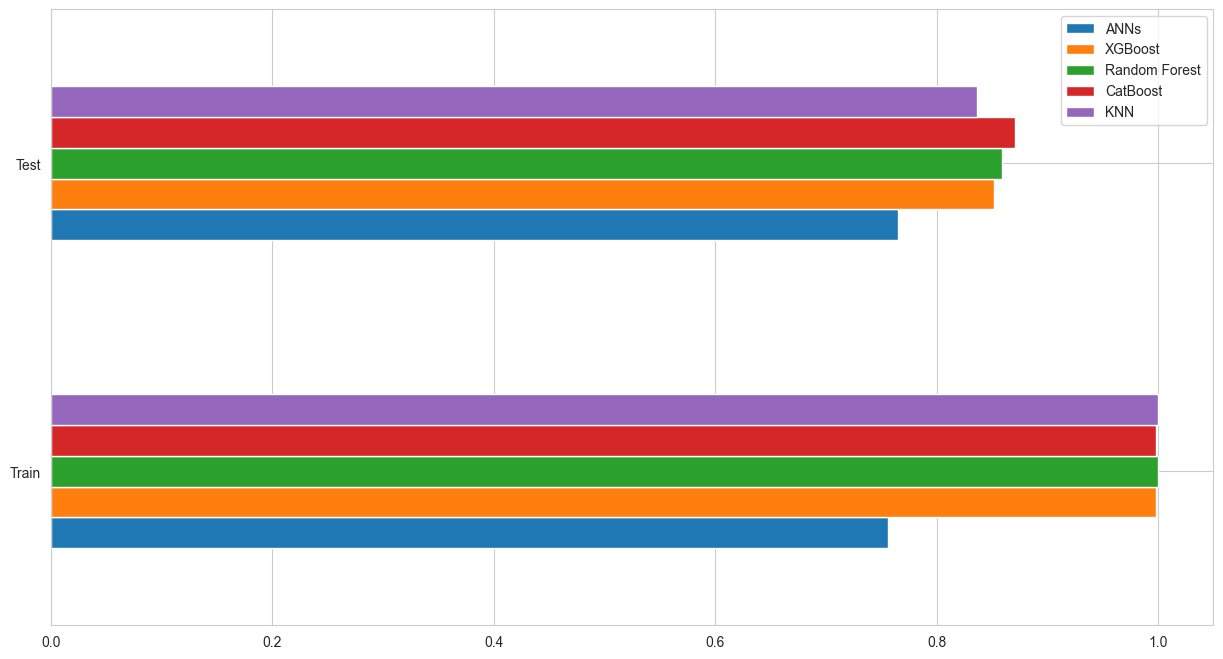

In [54]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))